# DDA3020 Assignment I

*Chen Zekai 陈泽楷*

*120090539@link.cuhk.edu.cn*

*School of Science and Engineering*

*The Chinese University of Hongkong, Shenzhen*

*2023.02.27*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

/Users/chenzekai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Task: Use appropriate attributes in ’crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat’ to predict the last attributes ’MEDV’.

In [2]:
#Step1 
df = pd.read_csv("./boston.csv") 
# Drop incomplete data point
df.dropna(inplace=True)
# Get the dummy variables
df1 = pd.get_dummies(df, drop_first=True)
# List and check the data: summarize the characteristics and guess relevant attribute for MEDV
print("Size of the dataframe = ", df1.shape,"\n")

df.info()
df1.head(n=20)
# After reading the listed data, I guess LSTAT and RM are the most relevant attributes for MEDV

Size of the dataframe =  (506, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


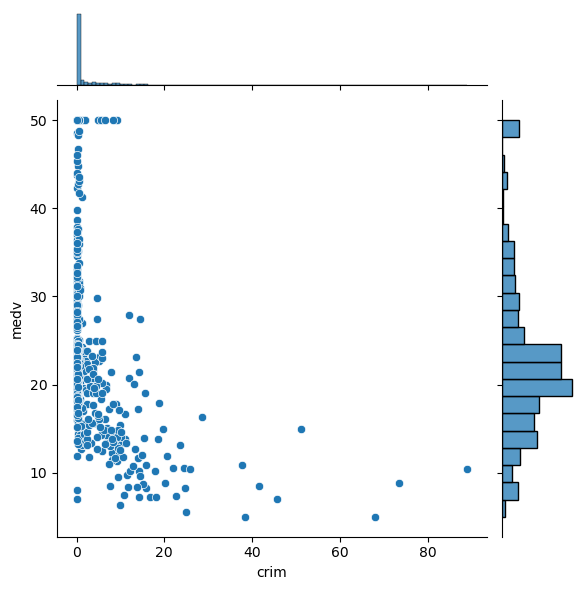

In [3]:
#Step2
sns.jointplot(x ='crim', y ='medv', data = df1)
plt.show()

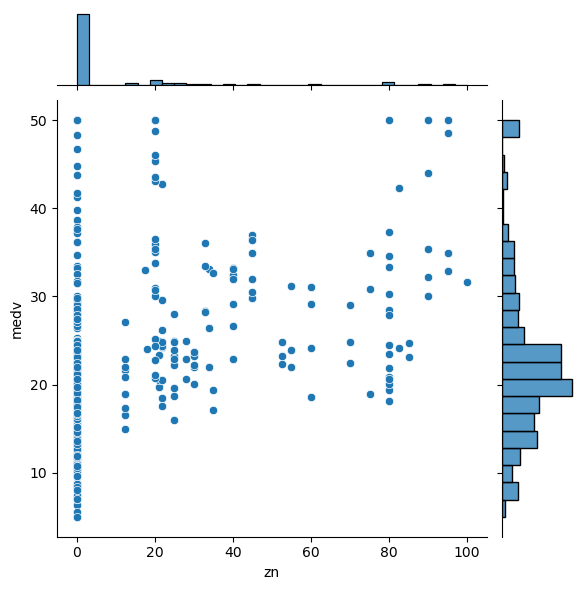

In [4]:
sns.jointplot(x ='zn', y ='medv', data = df1)
plt.show()

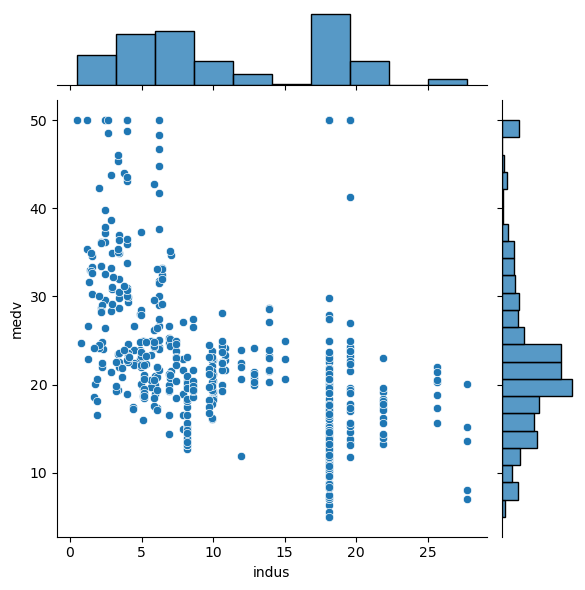

In [5]:
sns.jointplot(x ='indus', y ='medv', data = df1)
plt.show()

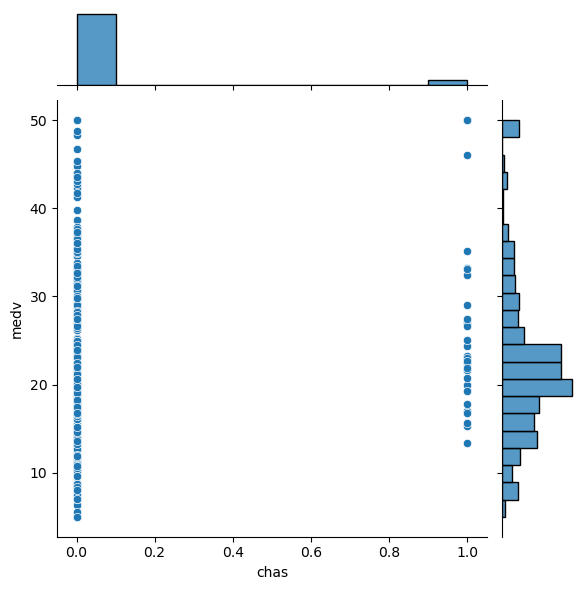

In [6]:
sns.jointplot(x ='chas', y ='medv', data = df1)
plt.show()

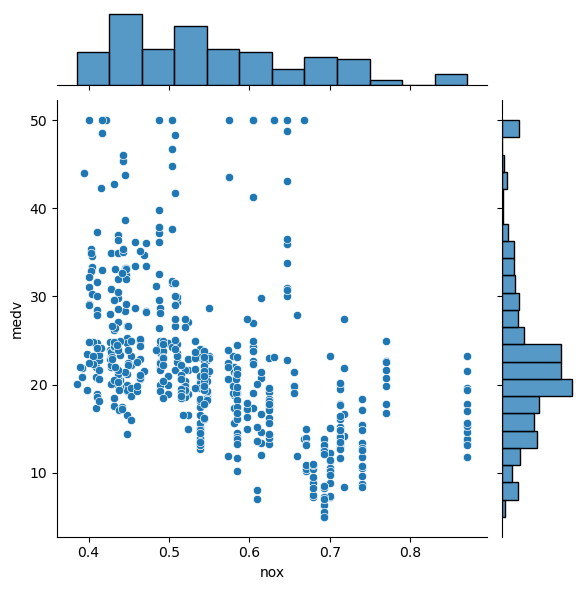

In [7]:
sns.jointplot(x ='nox', y ='medv', data = df1)
plt.show()

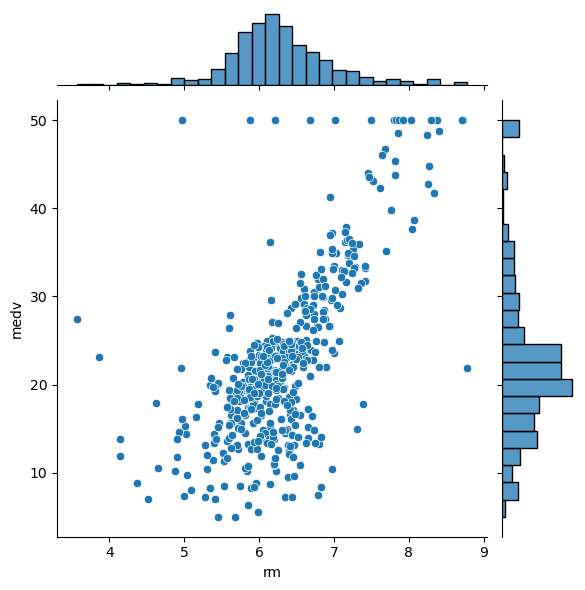

In [8]:
sns.jointplot(x ='rm', y ='medv', data = df1)
plt.show()

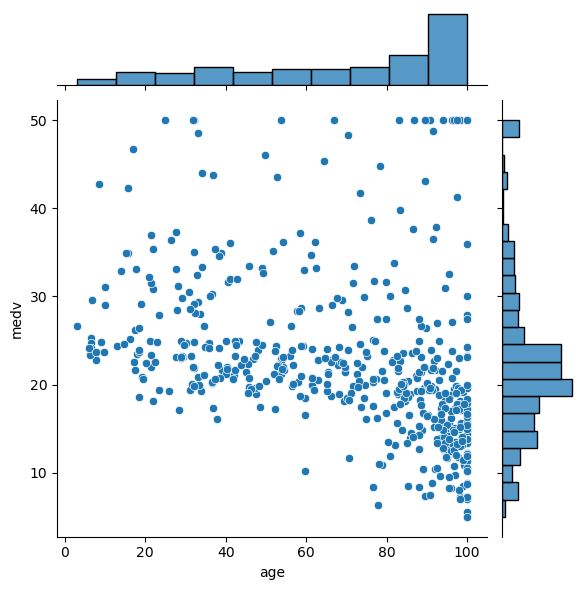

In [9]:
sns.jointplot(x ='age', y ='medv', data = df1)
plt.show()

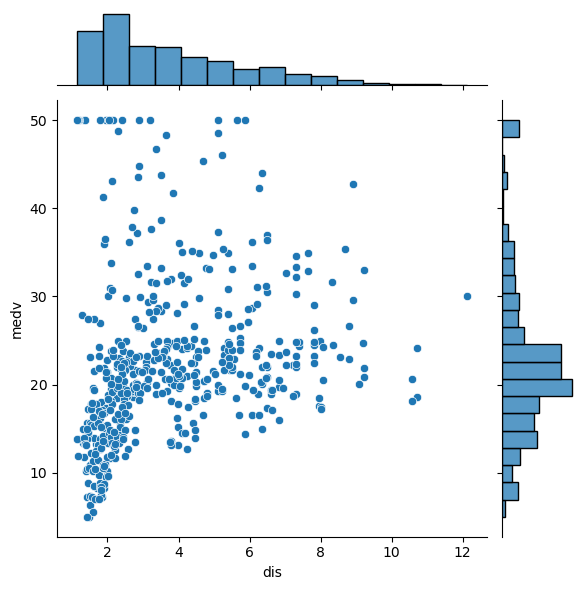

In [10]:
sns.jointplot(x ='dis', y ='medv', data = df1)
plt.show()

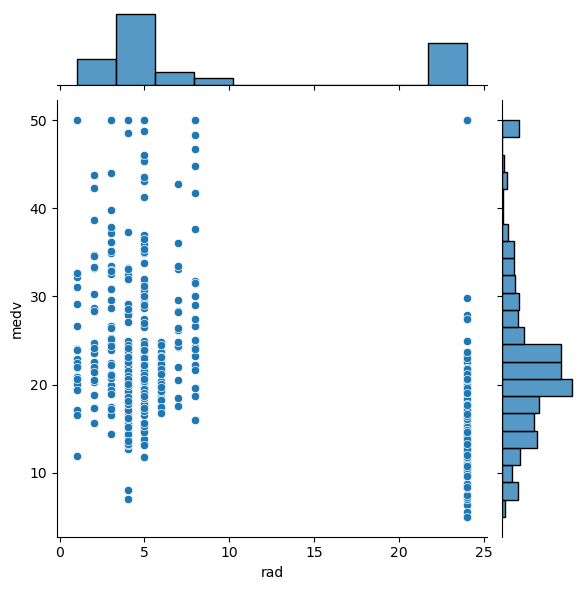

In [11]:
sns.jointplot(x ='rad', y ='medv', data = df1)
plt.show()

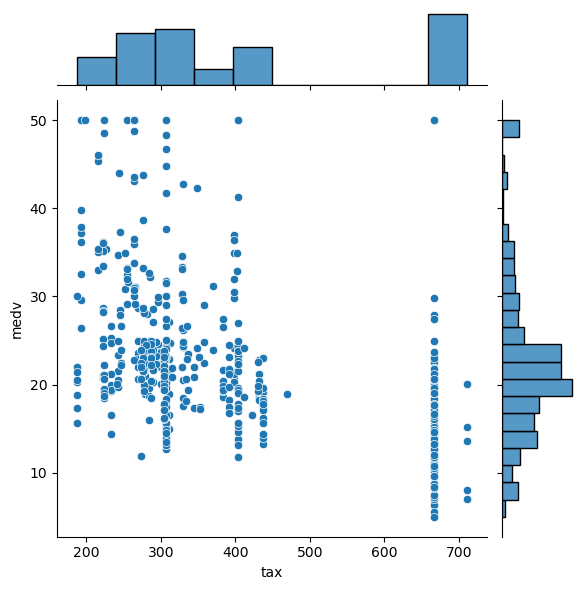

In [12]:
sns.jointplot(x ='tax', y ='medv', data = df1)
plt.show()

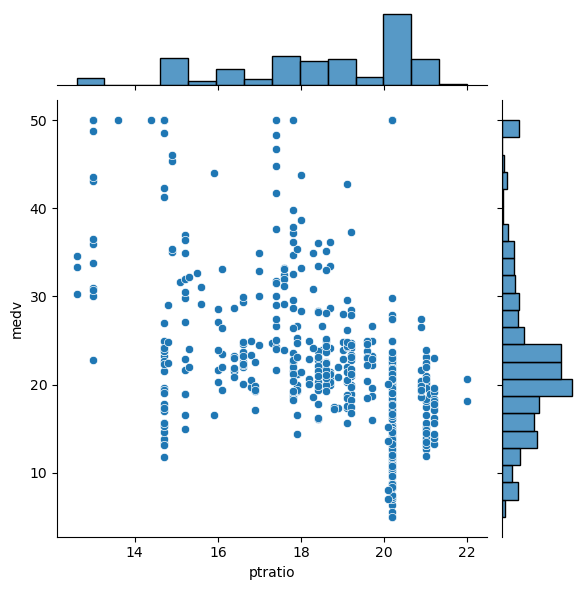

In [13]:
sns.jointplot(x ='ptratio', y ='medv', data = df1)
plt.show()

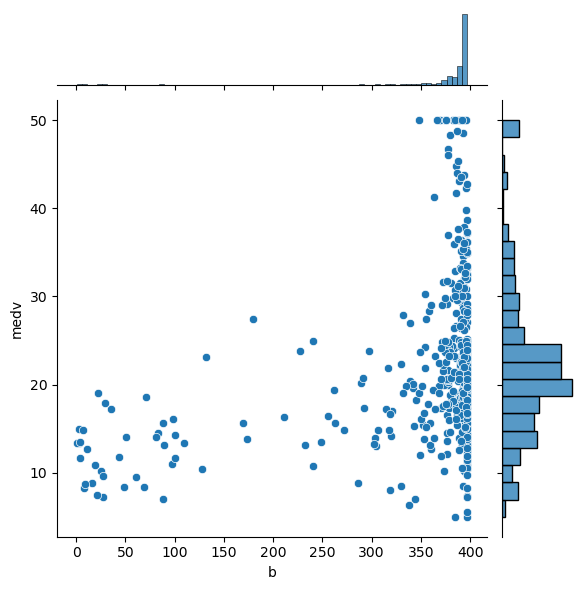

In [14]:
sns.jointplot(x ='b', y ='medv', data = df1)
plt.show()

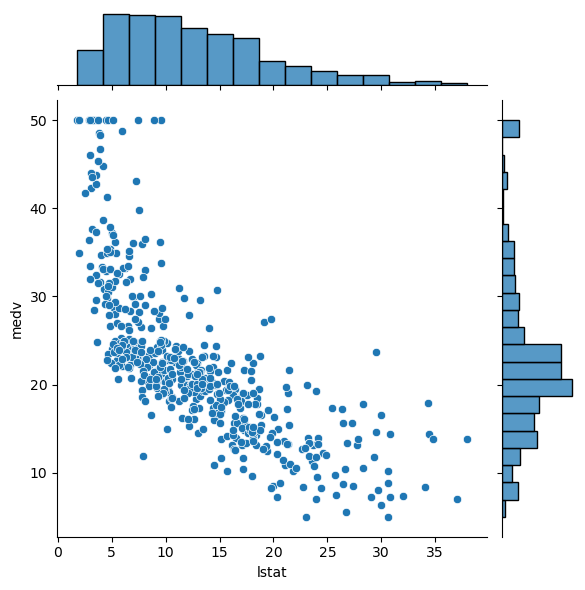

In [15]:
sns.jointplot(x ='lstat', y ='medv', data = df1)
plt.show()

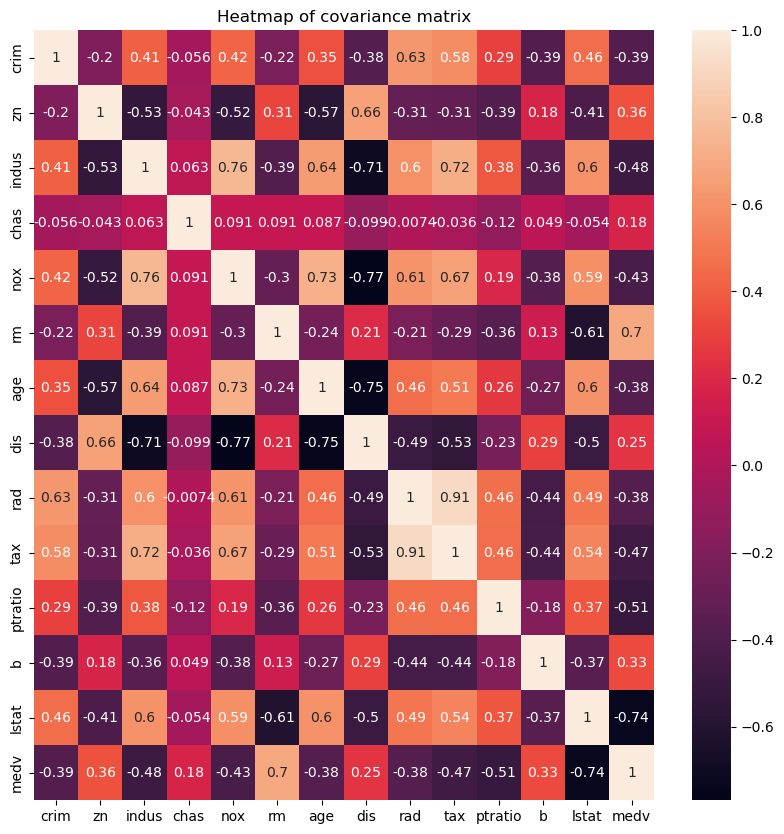

In [16]:
#Step3
# Plotting the covariance matrix
fig=plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)
plt.title("Heatmap of covariance matrix")
plt.show()


In [17]:
#Step4
mms = MinMaxScaler()
df1[['rm','lstat','tax','ptratio','indus']] = mms.fit_transform(df1[['rm','lstat','tax','ptratio','indus']])
df1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,0.067815,0,0.538,0.577505,65.2,4.0900,1,0.208015,0.287234,396.90,0.089680,24.0
1,0.02731,0.0,0.242302,0,0.469,0.547998,78.9,4.9671,2,0.104962,0.553191,396.90,0.204470,21.6
2,0.02729,0.0,0.242302,0,0.469,0.694386,61.1,4.9671,2,0.104962,0.553191,392.83,0.063466,34.7
3,0.03237,0.0,0.063050,0,0.458,0.658555,45.8,6.0622,3,0.066794,0.648936,394.63,0.033389,33.4
4,0.06905,0.0,0.063050,0,0.458,0.687105,54.2,6.0622,3,0.066794,0.648936,396.90,0.099338,36.2


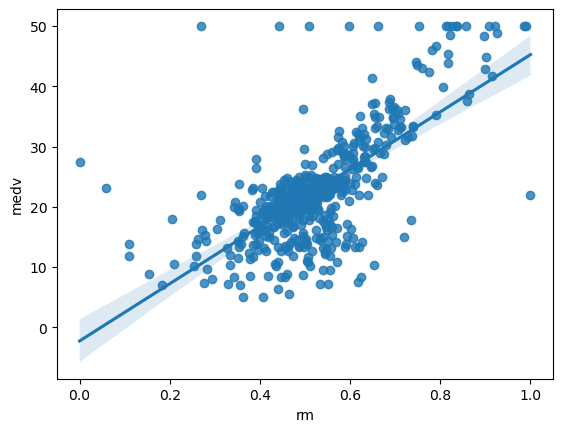

In [18]:
sns.regplot(x = "rm", y = "medv",data = df1)
plt.show()

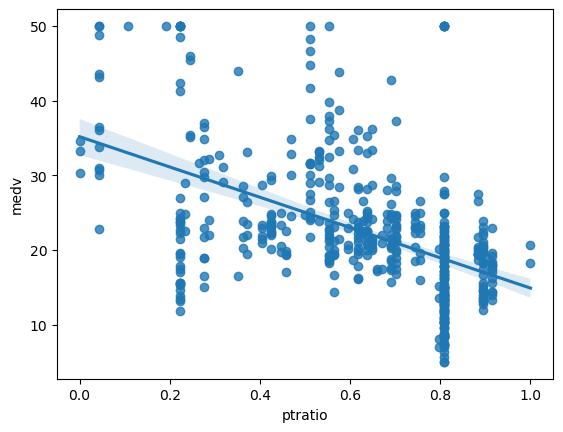

In [19]:
sns.regplot(x = "ptratio", y = "medv",data = df1)
plt.show()

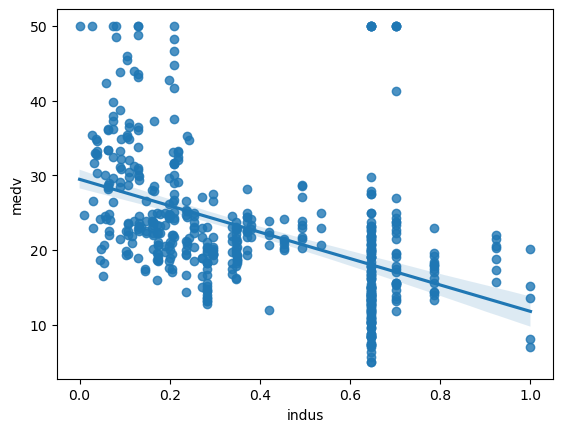

In [20]:
sns.regplot(x = "indus", y = "medv",data = df1)
plt.show()

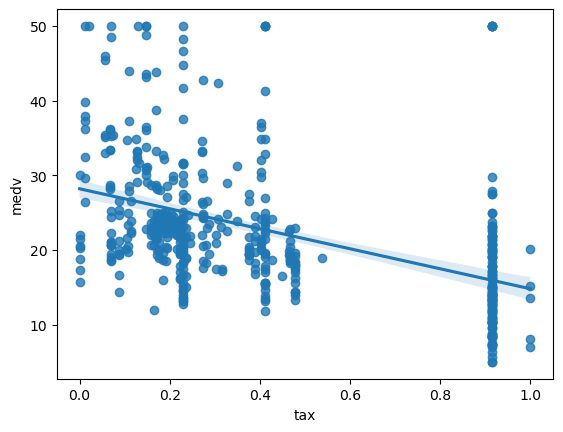

In [21]:
sns.regplot(x = "tax", y = "medv",data = df1)
plt.show()

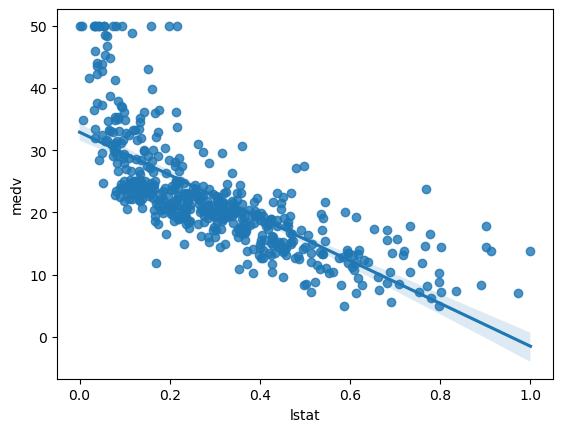

In [22]:

sns.regplot(x = "lstat", y = "medv",data = df1)
plt.show()

In [23]:
#Step5
# Preparing the training and testing data 
X = df1.loc[:,["rm","lstat","ptratio","tax","indus"]].values
y = df1["medv"].values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)
print("train size: ", train_X.shape[0])
print("test size: ", test_X.shape[0])



train size:  404
test size:  102


In [24]:

def RMSE(test_y,predicted_y):
    return np.sqrt(np.mean((test_y - predicted_y)**2))

class LinearRegression:
    def __init__(self,Max_Epoch,Tol):
        self.Max_Epoch = Max_Epoch
        self.Tol = Tol
        self.Weight = None

    #Function to compute gradient
    def gradient(self,X,y):
        return X.T @ ((X @ self.Weight) - y)
    
    #Function to do exact line search to find step size
    def Exact_Line_Search(self,Gradient,X):
        return (Gradient.T @ Gradient) / (Gradient.T @ (X.T @ (X @ Gradient)))

    def fit(self,X,y):
        #Loss is to store the loss curve along the way
        Loss = []
        
        # numpy.c_ = <numpy.lib.index_tricks.CClass object>#
        # Translates slice objects to concatenation along the second axis.
        # Here we add a bias to X
        X = np.c_[np.ones(X.shape[0]),X]
        
        #Set attribute Weight to 0
        self.Weight = np.zeros(X.shape[1])

        #Initial the Pre loss
        Pre_Loss = np.inf

        for _ in range(self.Max_Epoch):
            # Compute thegradient
            Gradient = self.gradient(X,y)

            # Compute exact line search step size
            Step_size = self.Exact_Line_Search(Gradient,X)

            #Update Weight
            self.Weight -= Gradient * Step_size

            #Record the loss curves in the training process
            loss = RMSE((X @ self.Weight),y)
            Loss.append(loss)
            
            #Stopping criterion
            if (abs(loss-Pre_Loss)<self.Tol): break

            #Pass the value
            Pre_Loss = loss


        #plot the loss curves in the training process
        plt.plot(Loss)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE')

    def predict(self,X):
        #First add a bias to X
        X = np.c_[np.ones(X.shape[0]), X]
        Predict_y = X @ self.Weight
        return Predict_y


------------------
Iteration= 1
Max_Epoch= 1000
Tolerance= 1e-10
Testing_Error= 4.4958782289581976
Training_Error= 5.361551883029418
------------------
Iteration= 2
Max_Epoch= 1000
Tolerance= 1e-09
Testing_Error= 4.495832393271507
Training_Error= 5.361551895017038
------------------
Iteration= 3
Max_Epoch= 1000
Tolerance= 1e-08
Testing_Error= 4.495689972018767
Training_Error= 5.361552017642544
------------------
Iteration= 4
Max_Epoch= 1000
Tolerance= 1e-07
Testing_Error= 4.4952369295156664
Training_Error= 5.361553262351463
------------------
Iteration= 5
Max_Epoch= 1000
Tolerance= 1e-06
Testing_Error= 4.493799730096253
Training_Error= 5.361565896777683
------------------
Iteration= 6
Max_Epoch= 1000
Tolerance= 9.999999999999999e-06
Testing_Error= 4.490043475612266
Training_Error= 5.361684807357116
------------------
Iteration= 7
Max_Epoch= 1000
Tolerance= 9.999999999999999e-05
Testing_Error= 4.475252540630772
Training_Error= 5.3628563965081355
------------------
Iteration= 8
Max_Epoch

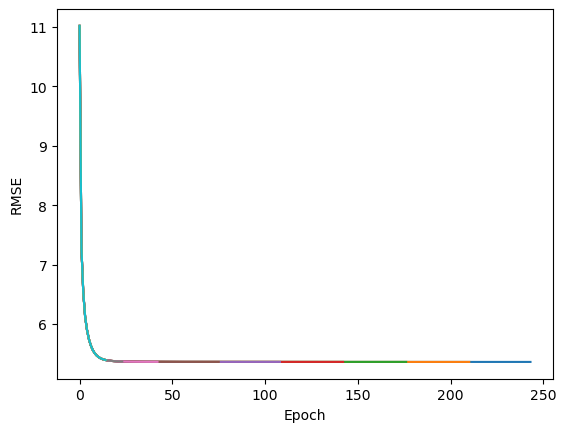

In [25]:
#Step 6 
#Use loops and print the RMSEs in each trial.
#Default parameter
i = 1000
j = 1e-10
for k in range (0,8):
    print('------------------')
    print('Iteration=',k+1)
    print('Max_Epoch=',i)
    print('Tolerance=',j)
    
    model = LinearRegression(Max_Epoch=i,Tol=j)
    model.fit(train_X,train_y)

    predicted_test_y  = model.predict(test_X)
    predicted_train_y = model.predict(train_X)

    Testing_Error  = RMSE(test_y,predicted_test_y)
    print('Testing_Error=',Testing_Error)

    Training_Error = RMSE(train_y,predicted_train_y)
    print('Training_Error=',Training_Error)

    j = j * 10

for k in range (8,10):
    i = i - 50

    print('------------------')
    print('Iteration=',k+1)
    print('Max_Epoch=',i)
    print('Tolerance=',j)
    
    model = LinearRegression(Max_Epoch=i,Tol=j)
    model.fit(train_X,train_y)

    predicted_test_y  = model.predict(test_X)
    predicted_train_y = model.predict(train_X)

    Testing_Error  = RMSE(test_y,predicted_test_y)
    print('Testing_Error=',Testing_Error)

    Training_Error = RMSE(train_y,predicted_train_y)
    print('Training_Error=',Training_Error)


------------------
Iteration= 1
Max_Epoch= 1000
Tolerance= 1e-10
Testing_Error= 4.4958782289581976
Training_Error= 5.361551883029418


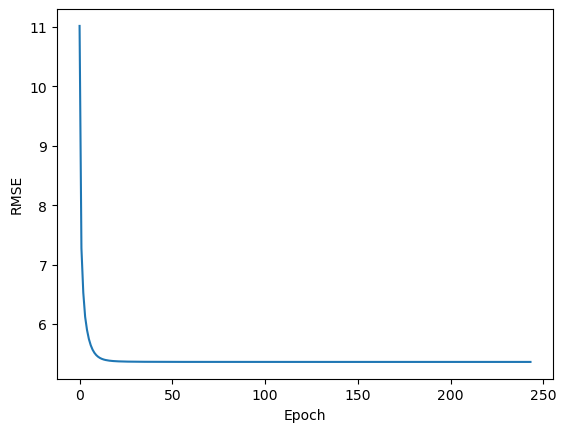

In [26]:
##Anoucement
##The function of following code only to show the loss curves in the each training process 
##Which are lost due to the limit of output size
print('------------------')
print('Iteration=',1)
print('Max_Epoch=',1000)
print('Tolerance=',1e-10)
model = LinearRegression(Max_Epoch=1000,Tol=1e-10)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 2
Max_Epoch= 1000
Tolerance= 1e-09
Testing_Error= 4.495832393271507
Training_Error= 5.361551895017038


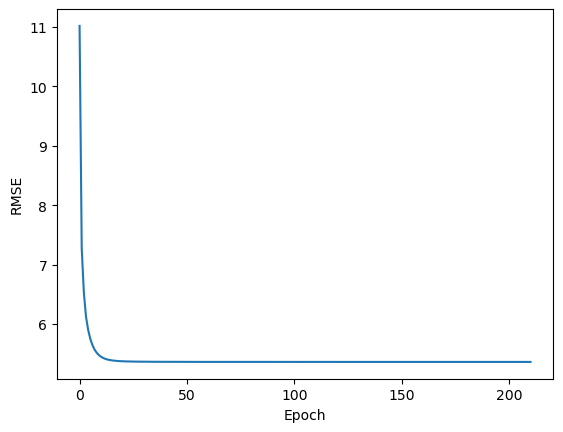

In [27]:
print('------------------')
print('Iteration=',2)
print('Max_Epoch=',1000)
print('Tolerance=',1e-9)
model = LinearRegression(Max_Epoch=1000,Tol=1e-9)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 3
Max_Epoch= 1000
Tolerance= 1e-08
Testing_Error= 4.495689972018767
Training_Error= 5.361552017642544


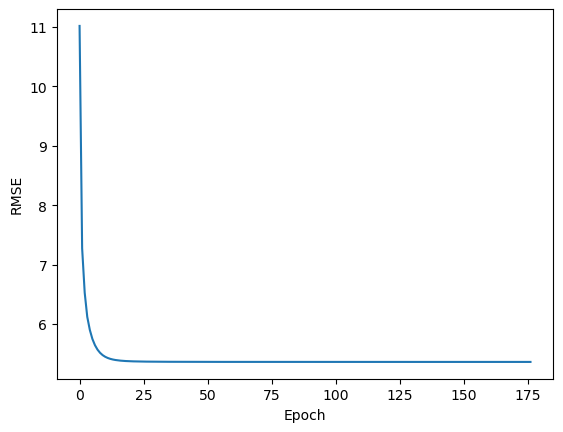

In [28]:
print('------------------')
print('Iteration=',3)
print('Max_Epoch=',1000)
print('Tolerance=',1e-8)
model = LinearRegression(Max_Epoch=1000,Tol=1e-8)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 4
Max_Epoch= 1000
Tolerance= 1e-07
Testing_Error= 4.4952369295156664
Training_Error= 5.361553262351463


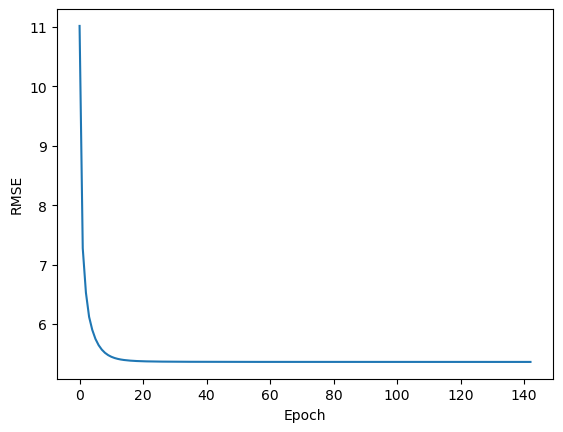

In [29]:
print('------------------')
print('Iteration=',4)
print('Max_Epoch=',1000)
print('Tolerance=',1e-7)
model = LinearRegression(Max_Epoch=1000,Tol=1e-7)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 5
Max_Epoch= 1000
Tolerance= 1e-06
Testing_Error= 4.493799730096253
Training_Error= 5.361565896777683


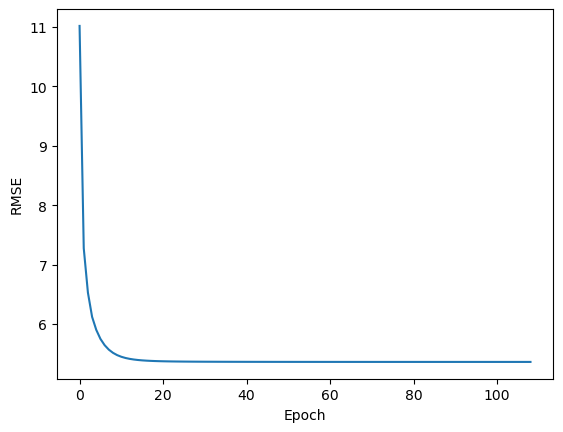

In [30]:
print('------------------')
print('Iteration=',5)
print('Max_Epoch=',1000)
print('Tolerance=',1e-6)
model = LinearRegression(Max_Epoch=1000,Tol=1e-6)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 6
Max_Epoch= 1000
Tolerance= 1e-05
Testing_Error= 4.490043475612266
Training_Error= 5.361684807357116


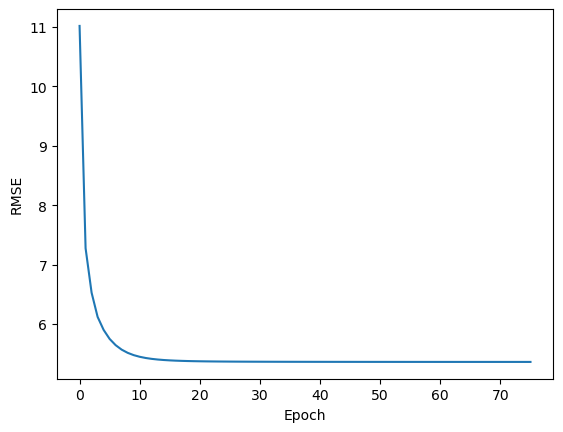

In [31]:
print('------------------')
print('Iteration=',6)
print('Max_Epoch=',1000)
print('Tolerance=',1e-5)
model = LinearRegression(Max_Epoch=1000,Tol=1e-5)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 7
Max_Epoch= 1000
Tolerance= 0.0001
Testing_Error= 4.475252540630772
Training_Error= 5.3628563965081355


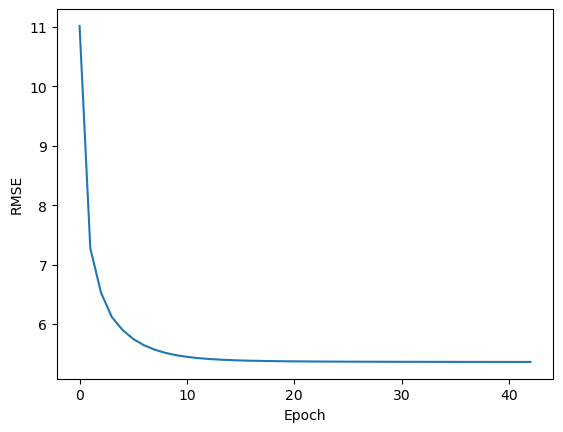

In [32]:
print('------------------')
print('Iteration=',7)
print('Max_Epoch=',1000)
print('Tolerance=',1e-4)
model = LinearRegression(Max_Epoch=1000,Tol=1e-4)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 8
Max_Epoch= 1000
Tolerance= 0.001
Testing_Error= 4.453952131122328
Training_Error= 5.3687798683184


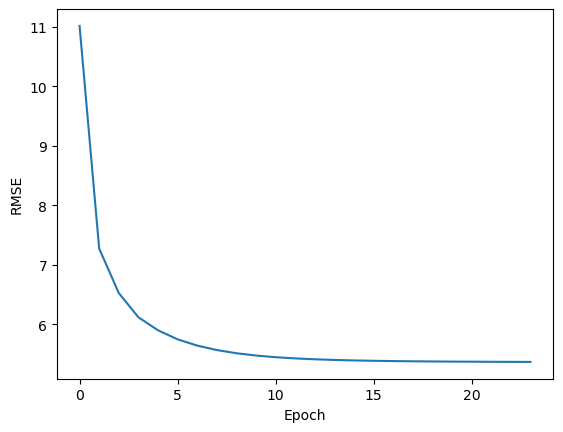

In [33]:
print('------------------')
print('Iteration=',8)
print('Max_Epoch=',1000)
print('Tolerance=',1e-3)
model = LinearRegression(Max_Epoch=1000,Tol=1e-3)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 9
Max_Epoch= 950
Tolerance= 0.001
Testing_Error= 4.453952131122328
Training_Error= 5.3687798683184


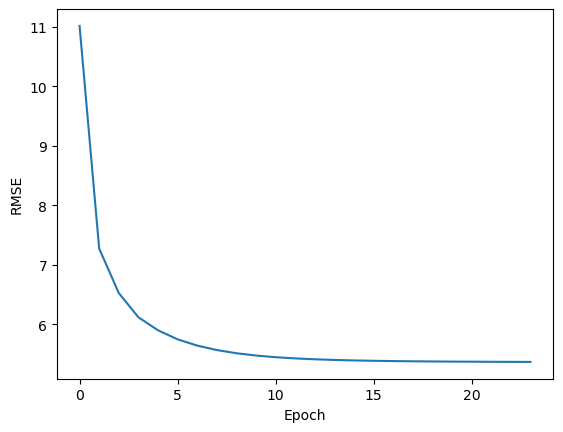

In [34]:
print('------------------')
print('Iteration=',9)
print('Max_Epoch=',950)
print('Tolerance=',1e-3)
model = LinearRegression(Max_Epoch=950,Tol=1e-3)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)

------------------
Iteration= 10
Max_Epoch= 900
Tolerance= 0.001
Testing_Error= 4.453952131122328
Training_Error= 5.3687798683184


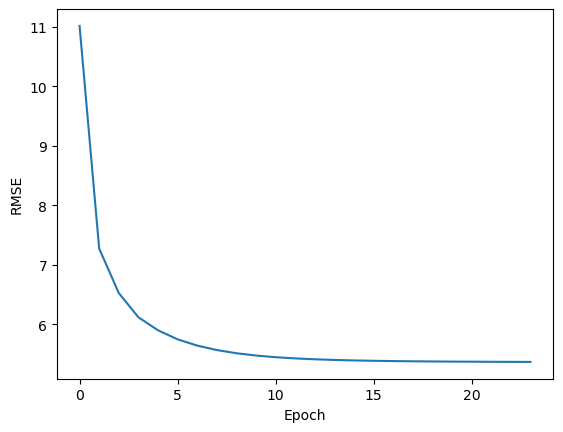

In [35]:
print('------------------')
print('Iteration=',10)
print('Max_Epoch=',900)
print('Tolerance=',1e-3)
model = LinearRegression(Max_Epoch=900,Tol=1e-3)
model.fit(train_X,train_y)

predicted_test_y  = model.predict(test_X)
predicted_train_y = model.predict(train_X)

Testing_Error  = RMSE(test_y,predicted_test_y)
print('Testing_Error=',Testing_Error)

Training_Error = RMSE(train_y,predicted_train_y)
print('Training_Error=',Training_Error)